In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import roc_curve, roc_auc_score


In [151]:
from ISLP import load_data
Caravan = load_data('Caravan')
Caravan.columns

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

## Caravan Dataset
Echte Kundendaten aus dem Versicherungssektor

Output-Variable: Purchase (yes=Versicherung für Wohnwagen abgeschlossen)


In [152]:
Caravan.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


In [153]:
Caravan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MOSTYPE   5822 non-null   int64   
 1   MAANTHUI  5822 non-null   int64   
 2   MGEMOMV   5822 non-null   int64   
 3   MGEMLEEF  5822 non-null   int64   
 4   MOSHOOFD  5822 non-null   int64   
 5   MGODRK    5822 non-null   int64   
 6   MGODPR    5822 non-null   int64   
 7   MGODOV    5822 non-null   int64   
 8   MGODGE    5822 non-null   int64   
 9   MRELGE    5822 non-null   int64   
 10  MRELSA    5822 non-null   int64   
 11  MRELOV    5822 non-null   int64   
 12  MFALLEEN  5822 non-null   int64   
 13  MFGEKIND  5822 non-null   int64   
 14  MFWEKIND  5822 non-null   int64   
 15  MOPLHOOG  5822 non-null   int64   
 16  MOPLMIDD  5822 non-null   int64   
 17  MOPLLAAG  5822 non-null   int64   
 18  MBERHOOG  5822 non-null   int64   
 19  MBERZELF  5822 non-null   int64   
 20  MBERBOER

In [154]:
Caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [155]:
Caravan.nunique()

MOSTYPE     40
MAANTHUI     9
MGEMOMV      5
MGEMLEEF     6
MOSHOOFD    10
            ..
APLEZIER     3
AFIETS       4
AINBOED      3
ABYSTAND     3
Purchase     2
Length: 86, dtype: int64

In [156]:
Caravan.Purchase.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [157]:
# Umwandlung der Purchase Variable Yes -> 1 und No -> 0
Caravan['Purchase'] = Caravan['Purchase'].map({'No': 0, 'Yes': 1})
Caravan['Purchase'].describe()
print('Anteil Yes: ', np.sum(Caravan.Purchase.astype('int64'))/Caravan.shape[0])
print('Anteil No: ', 1-np.sum(Caravan.Purchase.astype('int64'))/Caravan.shape[0])

Anteil Yes:  0.05977327378907592
Anteil No:  0.9402267262109241


In [158]:
Caravan.shape[0]

5822

## Logistische Regression

In [159]:
X = Caravan.drop('Purchase', axis=1)
y = Caravan[['Purchase']].values.ravel()

# Split in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training der Modelle
logistic_model = LogisticRegression().fit(X_train, y_train)

# Anwenden des Modells auf die Testdaten
y_pred = logistic_model.predict(X_test) # Klassifikation
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1] # p(x)


/opt/anaconda3/envs/ISLP/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [160]:
# Wahrscheinlichkeiten vorhersagen
y_prob = logistic_model.predict_proba(X_test)[:, 1]

# Definiere eine Liste von verschiedenen Cutoff-Punkten
cutoff_points = np.linspace(0,1,11)

f1_array = []

# Schleife durch verschiedene Cutoff-Points und berechne die Confusion Matrix
for cutoff in cutoff_points:
    # Vorhersagen basierend auf dem aktuellen Cutoff
    y_pred_custom_cutoff = (y_prob >= cutoff).astype(int)
    
    # Berechne die Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred_custom_cutoff)

    # f1-score
    f1 = f1_score(y_test, y_pred_custom_cutoff)
    f1_array.append((f1, cutoff))

    # Gib die Confusion Matrix als Text aus
    print(f"\nConfusion Matrix für Cutoff-Point = {cutoff}:\n")
    print(f"True Negatives (TN): {conf_matrix[0, 0]}")
    print(f"False Positives (FP): {conf_matrix[0, 1]}")
    print(f"False Negatives (FN): {conf_matrix[1, 0]}")
    print(f"True Positives (TP): {conf_matrix[1, 1]}")
     # F1-Score anzeigen
    print(f"F1-Score: {f1:.2f}")
    print('Accuracy: ', (conf_matrix[0, 0]+conf_matrix[1, 1])/(conf_matrix[0, 0]+conf_matrix[0, 1]+conf_matrix[1, 0]+conf_matrix[1, 1]))



Confusion Matrix für Cutoff-Point = 0.0:

True Negatives (TN): 0
False Positives (FP): 1084
False Negatives (FN): 0
True Positives (TP): 81
F1-Score: 0.13
Accuracy:  0.06952789699570816

Confusion Matrix für Cutoff-Point = 0.1:

True Negatives (TN): 947
False Positives (FP): 137
False Negatives (FN): 50
True Positives (TP): 31
F1-Score: 0.25
Accuracy:  0.8394849785407725

Confusion Matrix für Cutoff-Point = 0.2:

True Negatives (TN): 1057
False Positives (FP): 27
False Negatives (FN): 71
True Positives (TP): 10
F1-Score: 0.17
Accuracy:  0.9158798283261803

Confusion Matrix für Cutoff-Point = 0.30000000000000004:

True Negatives (TN): 1072
False Positives (FP): 12
False Negatives (FN): 80
True Positives (TP): 1
F1-Score: 0.02
Accuracy:  0.9210300429184549

Confusion Matrix für Cutoff-Point = 0.4:

True Negatives (TN): 1081
False Positives (FP): 3
False Negatives (FN): 80
True Positives (TP): 1
F1-Score: 0.02
Accuracy:  0.9287553648068669

Confusion Matrix für Cutoff-Point = 0.5:

True 

In [161]:
f1_scores_df = pd.DataFrame(f1_array, columns=["F1-Score","cutoff"])
# Finde die Zeile mit dem maximalen F1-Score
max_f1_row = f1_scores_df.loc[f1_scores_df['F1-Score'].idxmax()]

# Gib die Zeile mit dem maximalen F1-Score aus
max_f1_row

F1-Score    0.248996
cutoff      0.100000
Name: 1, dtype: float64

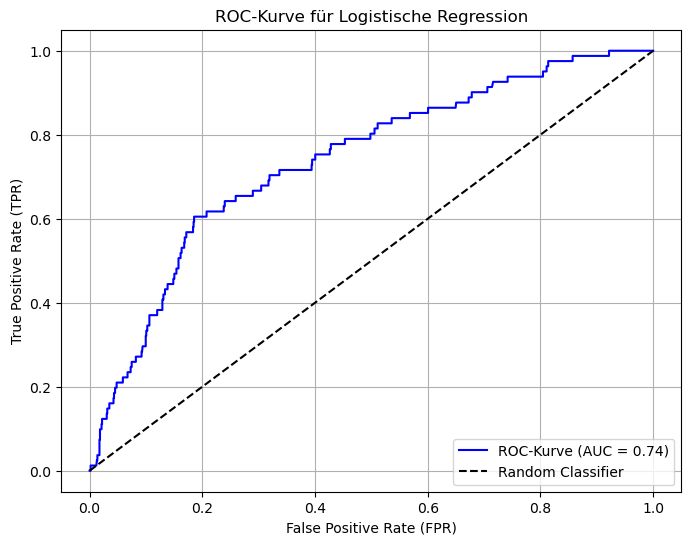

In [162]:
# Berechne die ROC-Kurve (FPR, TPR) für verschiedene Cutoff-Points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Berechne den AUC-Wert (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Zeichne die ROC-Kurve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC-Kurve (AUC = {auc_score:.2f})', color='b')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Diagonale Linie für Zufalls-Klassifikator
plt.title('ROC-Kurve für Logistische Regression')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## KNN

In [168]:
# Definiere verschiedene Werte für k
k_values = [1, 3, 5]

# Liste zum Speichern der F1-Scores für verschiedene k-Werte
f1_scores_knn = []

for k in k_values:
    print(k)
    # Training der Modelle
    knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

    # Anwenden des Modells auf die Testdaten
    y_pred_knn = knn_model.predict(X_test) # Klassifikation

     # Berechne den F1-Score
    f1 = f1_score(y_test, y_pred_knn)

    # Speichere k und den F1-Score in der Liste
    f1_scores_knn.append((k, f1))

# Konvertiere die Liste in ein Pandas DataFrame
f1_scores_knn_df = pd.DataFrame(f1_scores_knn, columns=["k", "F1-Score"])

print(f1_scores_knn_df)

1
3
5
   k  F1-Score
0  1  0.103896
1  3  0.042553
2  5  0.000000
